In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
test_data = pd.read_csv("./titanic/test.csv")
train_data = pd.read_csv("./titanic/train.csv")

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data["Ticket"].value_counts().to_frame()

,Ticket
CA. 2343,7
1601,7
347082,7
CA 2144,6
3101295,6
...,...
347466,1
315086,1
382651,1
364848,1


In [10]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
test_data.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [14]:
categorical_columns=["Pclass","Sex","Embarked"]
numerical_columns=["Age","SibSp","Parch","Fare"]

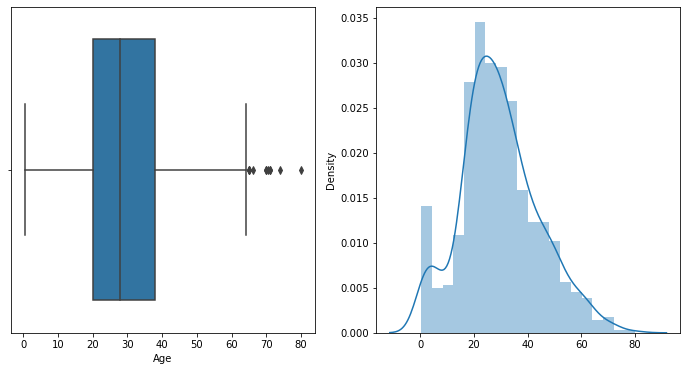

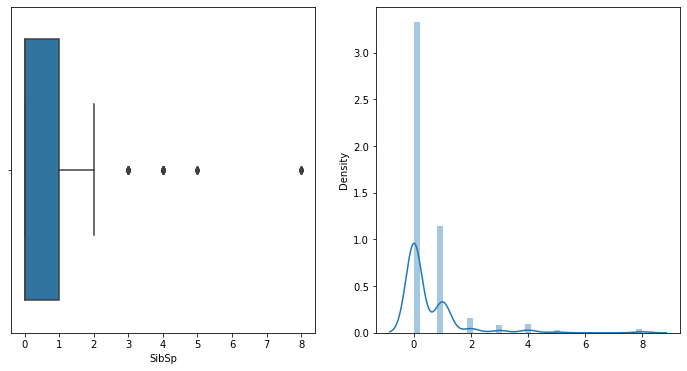

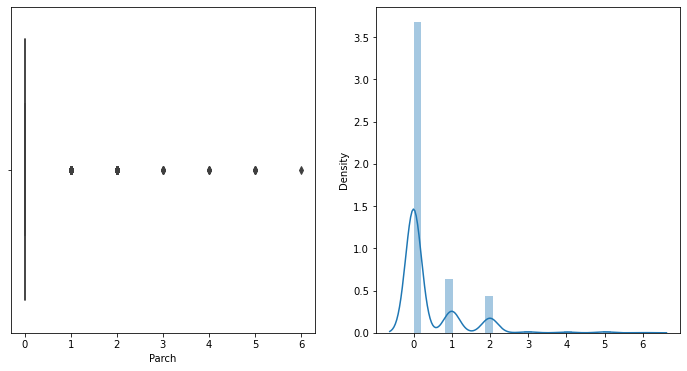

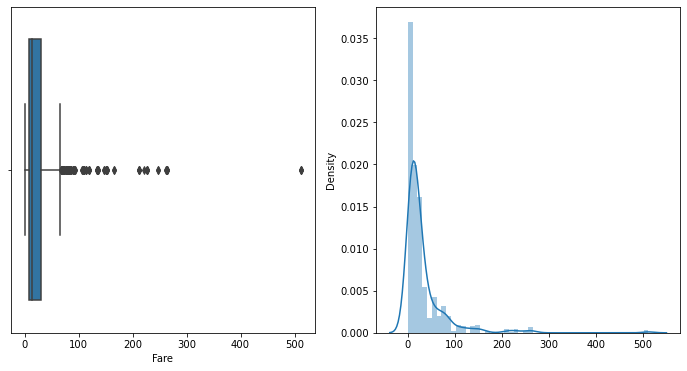

In [15]:
for i in numerical_columns:
    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    sns.boxplot(data=train_data,x=train_data[i],hue="Survived")
    plt.xlabel(i)
    
    plt.subplot(1,2,2)
    sns.distplot(x=train_data[i])
    plt.show()


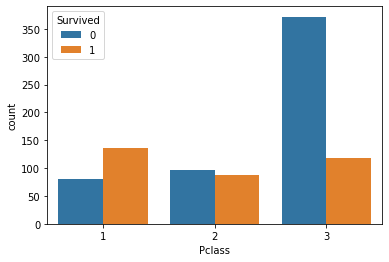

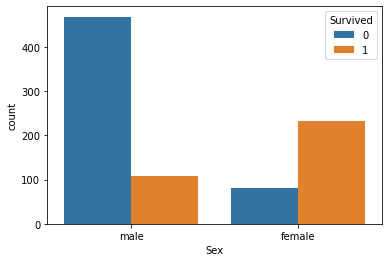

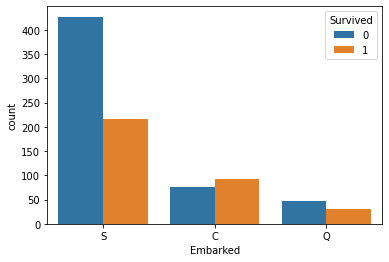

In [16]:
for i in categorical_columns:
    sns.countplot(data=train_data,x=train_data[i],hue="Survived")
    plt.show()

<AxesSubplot:>

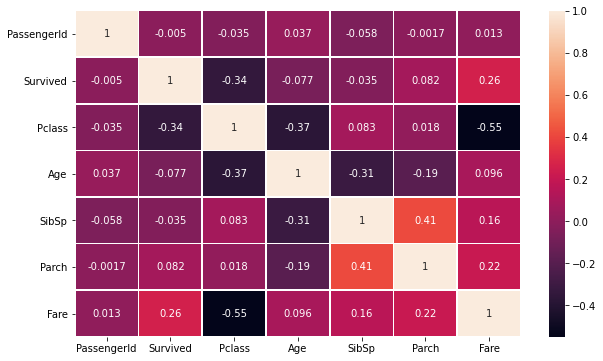

In [17]:
plt.figure(figsize = (10,6))
dff = train_data.corr()
sns.heatmap(dff, annot = True,  linewidth= 0.7)

### Data Preprocessing

#### One Hot Encoding

First, we need to perform one hot encoding to convert categorical variables to binary variables.

In [18]:
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Sex'] = train_data['Sex'].cat.codes

In [19]:
test_data['Sex'] = test_data['Sex'].astype('category')
test_data['Sex'] = test_data['Sex'].cat.codes

In [20]:
train_data['Embarked'] = train_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [21]:
train_data['Embarked'].isnull().sum()

2

In [22]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0
887,888,1,1,0,19.0,0,0,30.0000,0.0
888,889,0,3,0,NaN,1,2,23.4500,0.0
889,890,1,1,1,26.0,0,0,30.0000,1.0


1 => man
0 => women

#### KNN Imputation

In [23]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(train_data)
train_data_imputed = pd.DataFrame(imputed, columns=train_data.columns)

In [24]:
imputer_2 = KNNImputer(n_neighbors=5)
imputed_2 = imputer_2.fit_transform(test_data)
test_data_imputed = pd.DataFrame(imputed_2, columns=test_data.columns)

In [25]:
train_data_imputed

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0
888,889.0,0.0,3.0,0.0,27.2,1.0,2.0,23.4500,0.0
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


In [26]:
train_data_imputed.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [27]:
test_data_imputed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [28]:
train_data_imputed["Survived"] = train_data_imputed["Survived"].astype("int")

In [29]:
train_data_imputed

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,2.0,1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,1,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,4.0,1,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,5.0,0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,888.0,1,1.0,0.0,19.0,0.0,0.0,30.0000,0.0
888,889.0,0,3.0,0.0,27.2,1.0,2.0,23.4500,0.0
889,890.0,1,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


In [30]:
test_data_imputed

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892.0,3.0,1.0,34.5,0.0,0.0,7.8292,2.0
1,893.0,3.0,0.0,47.0,1.0,0.0,7.0000,0.0
2,894.0,2.0,1.0,62.0,0.0,0.0,9.6875,2.0
3,895.0,3.0,1.0,27.0,0.0,0.0,8.6625,0.0
4,896.0,3.0,0.0,22.0,1.0,1.0,12.2875,0.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,22.5,0.0,0.0,8.0500,0.0
414,1306.0,1.0,0.0,39.0,0.0,0.0,108.9000,1.0
415,1307.0,3.0,1.0,38.5,0.0,0.0,7.2500,0.0
416,1308.0,3.0,1.0,22.5,0.0,0.0,8.0500,0.0


### Modeling

In [31]:
x_train = train_data_imputed.drop("Survived",axis=1)
y=train_data_imputed["Survived"]

In [32]:
desicion_tree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
desicion_tree.fit(x_train,y)
yhat= desicion_tree.predict(test_data_imputed)

In [33]:
test_data_imputed["Survived"]=yhat

In [34]:
test_data_imputed

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892.0,3.0,1.0,34.5,0.0,0.0,7.8292,2.0,0
1,893.0,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0
2,894.0,2.0,1.0,62.0,0.0,0.0,9.6875,2.0,0
3,895.0,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0
4,896.0,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,1
...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,22.5,0.0,0.0,8.0500,0.0,0
414,1306.0,1.0,0.0,39.0,0.0,0.0,108.9000,1.0,1
415,1307.0,3.0,1.0,38.5,0.0,0.0,7.2500,0.0,0
416,1308.0,3.0,1.0,22.5,0.0,0.0,8.0500,0.0,0


[Text(0.5, 0.9, 'x[2] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.7, 'x[1] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.125, 0.5, 'x[6] <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.0625, 0.3, 'x[6] <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(0.03125, 0.1, 'entropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3, 'x[3] <= 2.5\nentropy = 0.141\nsamples = 100\nvalue = [2, 98]'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21875, 0.1, 'entropy = 0.081\nsamples = 99\nvalue = [1, 98]'),
 Text(0.375, 0.5, 'x[6] <= 23.35\nentropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(0.3125, 0.3, 'x[3] <= 36.1\nentropy = 0.977\nsamples = 117\nvalue = [48, 69]'),
 Text(0.28125, 0.1, 'entropy = 0.954\nsamples = 107\nvalue = [40, 67]'),
 Text(0.34375, 0.1, 'entropy = 0.722\nsamples = 10\nvalu

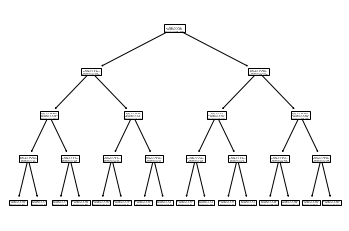

In [35]:
tree.plot_tree(desicion_tree)

In [36]:
submission = test_data_imputed[["PassengerId","Survived"]]
submission

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,894.0,0
3,895.0,0
4,896.0,1
...,...,...
413,1305.0,0
414,1306.0,1
415,1307.0,0
416,1308.0,0


In [40]:
submission["PassengerId"]=submission["PassengerId"].astype("int")

In [41]:
submission.to_csv("./out.csv",index=False)